<a href="https://colab.research.google.com/github/venkateshblks/Books-recommendation/blob/main/books_recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the data

In [1]:
import gdown
ids = {
    '1N-CdW6p9-I9qlZrasPtdNLfTLNI3kzSI': 'books.csv',
    '1QASxUtIOW3DZ3c_5LvRjBmMieQj4a27i': 'ratings.csv',
    '1DEy8-h_l4IYCtOiourkrs9xpjjiJDmKX': 'users.csv',
}

for file_id, output_filename in ids.items():
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, output_filename, quiet=False)
    print(f'Downloaded {output_filename}')


Downloading...
From: https://drive.google.com/uc?id=1N-CdW6p9-I9qlZrasPtdNLfTLNI3kzSI
To: /content/books.csv
100%|██████████| 73.3M/73.3M [00:02<00:00, 35.0MB/s]


Downloaded books.csv


Downloading...
From: https://drive.google.com/uc?id=1QASxUtIOW3DZ3c_5LvRjBmMieQj4a27i
To: /content/ratings.csv
100%|██████████| 22.6M/22.6M [00:00<00:00, 79.9MB/s]


Downloaded ratings.csv


Downloading...
From: https://drive.google.com/uc?id=1DEy8-h_l4IYCtOiourkrs9xpjjiJDmKX
To: /content/users.csv
100%|██████████| 11.0M/11.0M [00:00<00:00, 86.9MB/s]

Downloaded users.csv


## Importing Libraries

In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [3]:
books=pd.read_csv('books.csv')
users=pd.read_csv('users.csv')
ratings=pd.read_csv('ratings.csv')

In [4]:
display(books.head(3))
display(books.shape)
display(users.head(3))
display(users.shape)
display(ratings.head(3))
ratings.shape

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


(271360, 8)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


(278858, 3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


(1149780, 3)

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [6]:
users.isna().sum()

,0
User-ID,0
Location,0
Age,110762


In [7]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [8]:
ratings.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [9]:
print(books.duplicated().sum())
print(users.duplicated().sum())
ratings.duplicated().sum()

0
0


0

**Let's perform a merge operation between ratings and books dataframes**

In [10]:
print(books.shape)
ratings.shape

(271360, 8)


(1149780, 3)

In [11]:
rating_books=ratings.merge(books,on='ISBN')
rating_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [12]:
rating_books.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [13]:
rating_books1=rating_books.drop(['ISBN','Image-URL-S','Image-URL-M'],axis=1)

In [14]:
rating_books1.head(3)

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...


In [15]:
df = rating_books1.merge(users.drop("Age", axis=1), on="User-ID")
df

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa"
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa"
2,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa"
3,2313,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa"
4,2313,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa"
...,...,...,...,...,...,...,...,...
1031131,276442,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland"
1031132,276618,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany"""
1031133,276647,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa"
1031134,276647,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa"


In [16]:
df.isna().sum()

,0
User-ID,0
Book-Rating,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-L,4
Location,0


In [17]:
df.shape

(1031136, 8)

In [18]:
df1=df.dropna()
df1.isna().sum()

,0
User-ID,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-L,0
Location,0


In [19]:
df1.shape

(1031128, 8)

In [20]:
df1.head(3)

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa"
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa"
2,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa"


In [21]:
df1['User-ID'].nunique()

92106

**There are 92k users**

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031128 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031128 non-null  int64 
 1   Book-Rating          1031128 non-null  int64 
 2   Book-Title           1031128 non-null  object
 3   Book-Author          1031128 non-null  object
 4   Year-Of-Publication  1031128 non-null  object
 5   Publisher            1031128 non-null  object
 6   Image-URL-L          1031128 non-null  object
 7   Location             1031128 non-null  object
dtypes: int64(2), object(6)
memory usage: 70.8+ MB


**The 'Year of Publication' is of object type, so convert it to an integer data type**

In [23]:
df1['Year-Of-Publication'] = pd.to_numeric(df1['Year-Of-Publication'], errors='coerce')
df1['Year-Of-Publication'].dtype

dtype('int64')

In [24]:
df1['Year-Of-Publication'].isna().sum()

0

**Splits location strings by commas &Keeps only the last part (country name)**

In [25]:
df2=df1.copy()
df2['Location'] = df1['Location'].str.split(',').str[-1].str.strip()
df2.head(3)

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
2,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,usa


In [26]:
df1.Location.nunique()

22480

In [27]:
df2.Location.nunique()

288

# EDA

In [28]:
df2.nunique()

,0
User-ID,92106
Book-Rating,11
Book-Title,241065
Book-Author,101584
Year-Of-Publication,116
Publisher,16725
Image-URL-L,269835
Location,288


In [29]:
df2['Book-Rating'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [30]:
df2['Book-Rating'].value_counts().sort_values()

,count
Book-Rating,
1,1481
2,2375
3,5118
4,7617
6,31687
5,45355
9,60776
7,66401
10,71224


In [31]:
df2.Location.value_counts()

,count
Location,
usa,746462
canada,93000
united kingdom,33071
germany,27657
,24259
...,...
"""",1
unknown,1
ethiopia,1


**Most of the users are from usa**

In [32]:
df2['Year-Of-Publication'].value_counts()

,count
Year-Of-Publication,
2002,91799
2001,79800
1999,75193
2003,72538
2000,72326
...,...
2024,1
1897,1
1806,1


**In 2002 Highest Number of Publications**




In [33]:
df2.groupby('User-ID')['Book-Rating'].count().sort_values(ascending=False)

,Book-Rating
User-ID,
11676,11144
198711,6456
153662,5814
98391,5777
35859,5646
...,...
119065,1
119082,1
119085,1


**The user with ID 11676 received more ratings than any other user**

In [34]:
df2.head(3)

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
2,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,usa


In [35]:
df2.groupby(['User-ID', 'Book-Title'], as_index=False).agg({'Book-Rating': 'mean'})

,User-ID,Book-Title,Book-Rating
0,2,Classical Mythology,0.0
1,8,A Second Chicken Soup for the Woman's Soul (Ch...,0.0
2,8,Clara Callan,5.0
3,8,Decision in Normandy,0.0
4,8,Flu: The Story of the Great Influenza Pandemic...,0.0
...,...,...,...
1026345,278854,Hornet's Nest,7.0
1026346,278854,In Her Day,6.0
1026347,278854,Kat Scratch Fever (Kat Colorado Mysteries),7.0
1026348,278854,The Cat Who Ate Danish Modern (Cat Who... (Pap...,0.0


In [93]:
num_ratings_per_user = df2.groupby('User-ID')['Book-Rating'].count()
top_user_ids = num_ratings_per_user[num_ratings_per_user > 200].index
top_user_ids

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [94]:
df3=df2[df2['User-ID'].isin(top_user_ids)]

In [95]:
df3.shape

(474002, 8)

In [78]:
df3.head(3)

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
654,23768,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
655,23768,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,usa
656,23768,0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,usa


## Data Visualization:

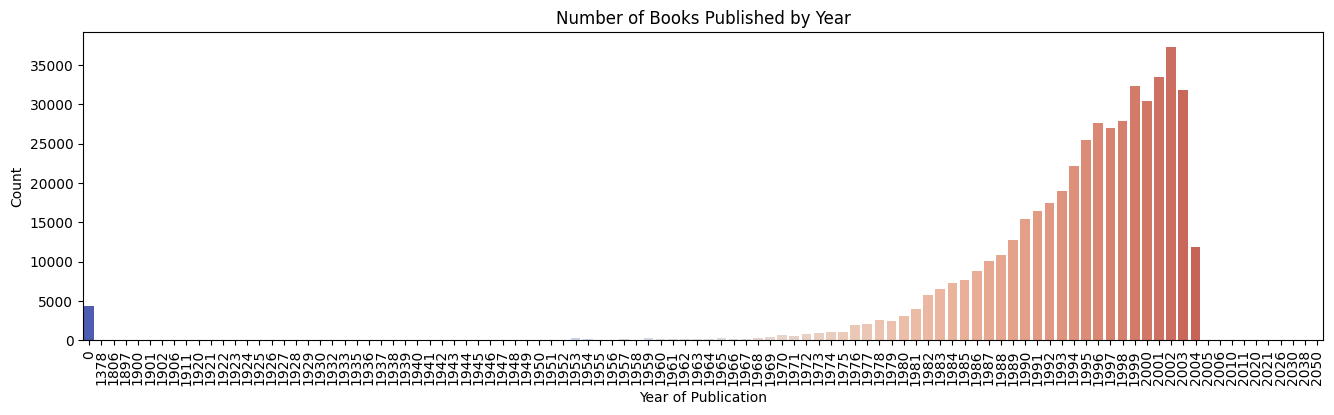

In [40]:
plt.figure(figsize=(16, 4))
sns.countplot(data=df3, x='Year-Of-Publication', palette='coolwarm')
plt.title('Number of Books Published by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.xticks(rotation=90)
k=1


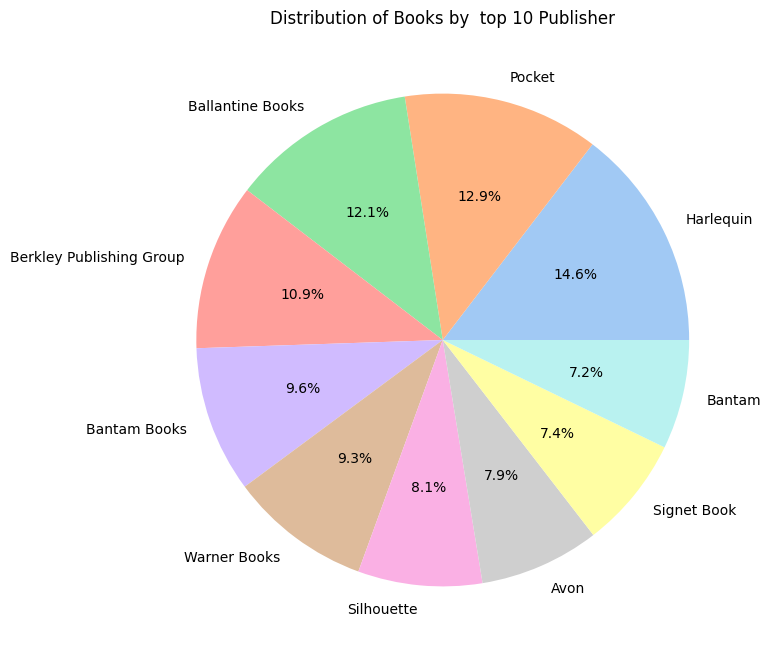

In [41]:
publisher_counts = df3['Publisher'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(publisher_counts, labels=publisher_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Books by  top 10 Publisher')
plt.show()

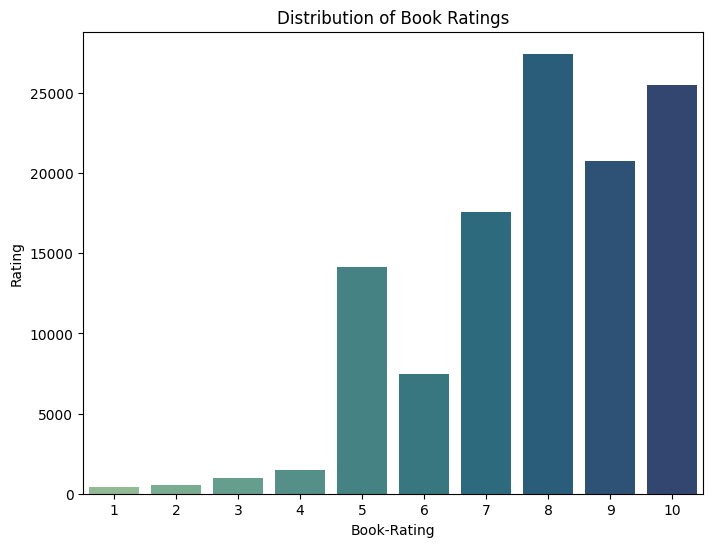

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df3['Book-Rating'].value_counts().tail(10), palette='crest')
plt.title('Distribution of Book Ratings')
plt.ylabel('Rating')
plt.show()


In [43]:
df3.head(3)

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
37,6543,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
38,6543,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,usa
39,6543,0,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,usa


In [44]:
df3.shape

(474002, 8)

In [103]:
df4=df3[df3['Book-Rating']>0]
df4.shape

(116356, 8)

# Model Development

In [105]:
user_item= df4.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

In [106]:
import scipy.sparse as sp
user_item_sparse = sp.csr_matrix(user_item.fillna(0))

In [107]:
user_item_sparse

<806x64849 sparse matrix of type '<class 'numpy.float64'>'
	with 115530 stored elements in Compressed Sparse Row format>

In [108]:
user_item.shape

(806, 64849)

In [109]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_sparse)

In [110]:
user_similarity.shape

(806, 806)

In [111]:
user_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.01284039, ..., 0.        , 0.02423676,
        0.        ],
       [0.        , 0.01284039, 1.        , ..., 0.02045053, 0.        ,
        0.00714798],
       ...,
       [0.        , 0.        , 0.02045053, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.02423676, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.00714798, ..., 0.        , 0.        ,
        1.        ]])

In [112]:
us_df=pd.DataFrame(user_similarity, index=user_item.index, columns=user_item.index)

In [124]:
def recommend_books(user_id, user_item_matrix, user_similarity_df, num_recommendations=5):
    if user_id not in user_similarity_df.index:
        raise ValueError(f"User ID {user_id} not found in similarity matrix.")
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]
    similar_users_ratings = user_item_matrix.loc[similar_users]
    mean_ratings = similar_users_ratings.mean(axis=0)
    user_rated_books = user_item_matrix.loc[user_id].dropna().index
    mean_ratings = mean_ratings.drop(user_rated_books, errors='ignore')
    recommendations = mean_ratings.sort_values(ascending=False).head(num_recommendations)
    return recommendations

In [123]:
recommend_books(254, user_item, us_df)

,0
Book-Title,
Pro Football: Four Decades of Sports Illustrated's Finest Writing on America's Most Popular Sport (Collector's Library),10.0
The Spy (Liars Club),10.0
C Is for Corpse (Kinsey Millhone Mysteries (Audio)),10.0
Spic-O-Rama: A Dysfunctional Comedy,10.0
Harry Potter and the Goblet of Fire,10.0


In [122]:
pd.DataFrame(df4['User-ID'].unique()).sort_values(by=0)

,0
369,254
370,2276
490,2766
712,2977
16,3363
...,...
441,274308
53,275970
107,277427
590,277639
